In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset and get a basic overview

In [160]:
df = pd.read_csv(r'/Users/samridhipandey/Desktop/NW_Details/Semester_4/ML/Group Assignment/mental_health_data_final_data.csv')

# Display shape, column names, and data types
print("Dataset shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)

# Display the first few rows of the dataset
df.head()

Dataset shape: (50000, 17)

Column names:
 ['User_ID', 'Age', 'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Stress_Level', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage']

Data types:
 User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
Social_Media_Usage         float64
Diet_Quality                object
Smoking_Habit               object
Alcohol_Consumption         object
Medication_Usage            object
dtype: object


,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption,Medication_Usage
0,1,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,2,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,3,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,4,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,5,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


## Check for missing values and display basic descriptive statistics

In [109]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# missing data summary
print("Missing Data Summary:")
print(missing_data_summary)

# descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
df.describe()


Missing Data Summary:
                         Missing Values  Missing Percentage (%)
Severity                          25002                  50.004
User_ID                               0                   0.000
Sleep_Hours                           0                   0.000
Alcohol_Consumption                   0                   0.000
Smoking_Habit                         0                   0.000
Diet_Quality                          0                   0.000
Social_Media_Usage                    0                   0.000
Physical_Activity_Hours               0                   0.000
Work_Hours                            0                   0.000
Stress_Level                          0                   0.000
Age                                   0                   0.000
Consultation_History                  0                   0.000
Mental_Health_Condition               0                   0.000
Country                               0                   0.000
Occupation        

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,41.473080,7.009934,55.062860,4.982040,3.243160
std,14433.901067,13.844185,1.732674,14.691575,3.161759,1.585235
min,1.000000,18.000000,4.000000,30.000000,0.000000,0.500000
25%,12500.750000,29.000000,5.500000,42.000000,2.000000,1.900000
50%,25000.500000,41.000000,7.000000,55.000000,5.000000,3.200000
75%,37500.250000,53.000000,8.500000,68.000000,8.000000,4.600000
max,50000.000000,65.000000,10.000000,80.000000,10.000000,6.000000


## Summarizing Categorical Values

In [112]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_summary = {}

for col in categorical_columns:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())



Value counts for Gender:

Gender
Female               12633
Prefer not to say    12558
Male                 12473
Non-binary           12336
Name: count, dtype: int64

Value counts for Occupation:

Occupation
Finance        7286
IT             7281
Other          7112
Healthcare     7105
Education      7089
Engineering    7072
Sales          7055
Name: count, dtype: int64

Value counts for Country:

Country
India        7323
USA          7271
Germany      7156
Canada       7149
Other        7124
Australia    7014
UK           6963
Name: count, dtype: int64

Value counts for Mental_Health_Condition:

Mental_Health_Condition
No     25003
Yes    24997
Name: count, dtype: int64

Value counts for Severity:

Severity
Medium    8436
High      8301
Low       8261
Name: count, dtype: int64

Value counts for Consultation_History:

Consultation_History
No     25110
Yes    24890
Name: count, dtype: int64

Value counts for Stress_Level:

Stress_Level
Medium    16847
High      16707
Low       16446

## Univariate Analysis

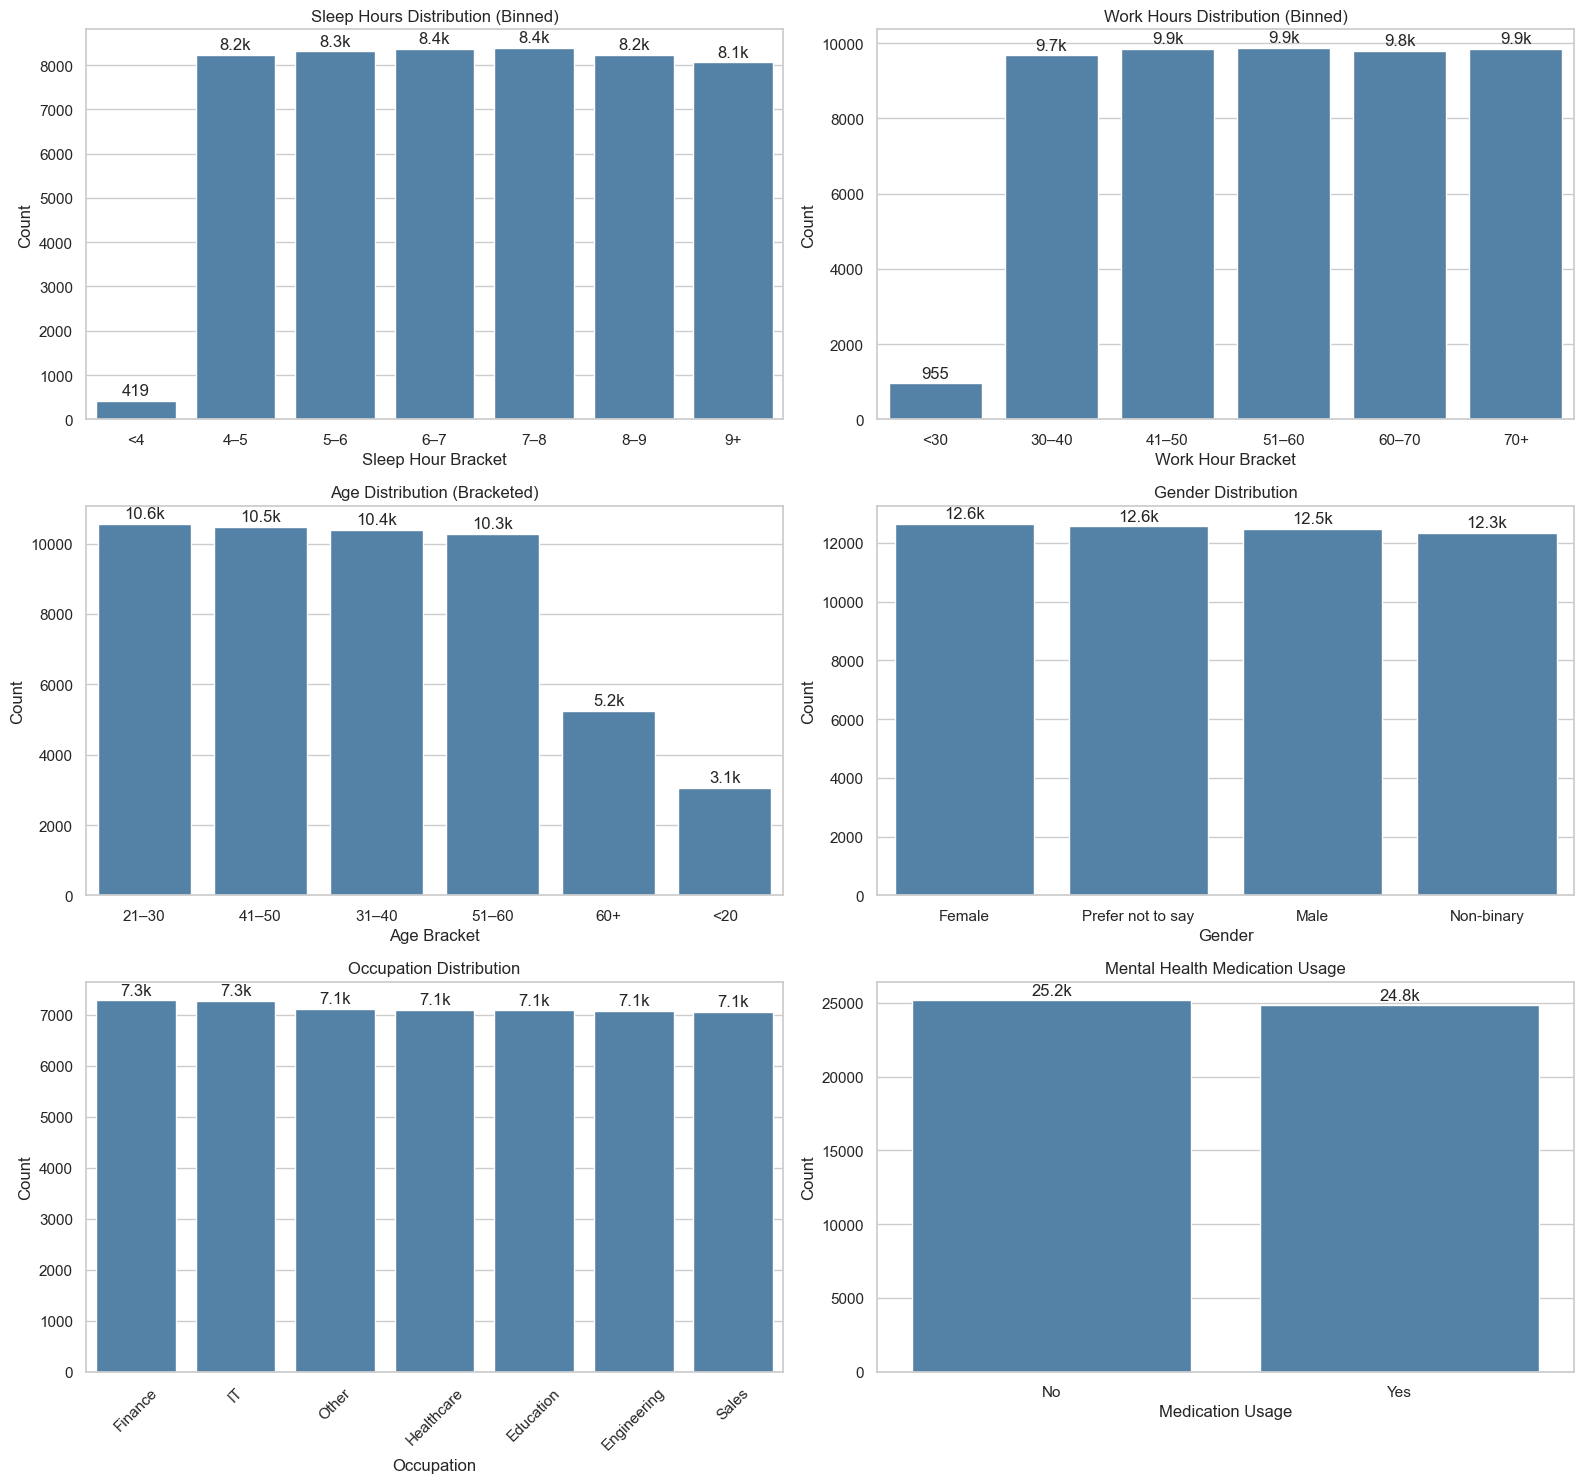

In [170]:
# Define formatter for large counts
def format_thousands(value):
    return f'{value/1000:.1f}k' if value >= 1000 else str(int(value))

# Create bracket columns
df['Sleep_Hour_Bracket'] = pd.cut(
    df['Sleep_Hours'],
    bins=[0, 4, 5, 6, 7, 8, 9, 24],
    labels=['<4', '4–5', '5–6', '6–7', '7–8', '8–9', '9+']
)
df['Work_Hour_Bracket'] = pd.cut(
    df['Work_Hours'],
    bins=[0, 30, 40, 50, 60, 70, 168],
    labels=['<30', '30–40', '41–50', '51–60', '60–70', '70+']
)
df['Age_Bracket'] = pd.cut(
    df['Age'],
    bins=[0, 20, 30, 40, 50, 60, 100],
    labels=['<20', '21–30', '31–40', '41–50', '51–60', '60+']
)

# Set style and color
sns.set(style="whitegrid")
plot_color = 'steelblue'

# Create 3×2 grid
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

# Helper to draw and label countplots
def countplot_with_labels(ax, **kwargs):
    plot = sns.countplot(ax=ax, **kwargs)
    ax.set_xlabel(kwargs.get('x').replace('_', ' ').title())
    ax.set_ylabel('Count')
    for container in plot.containers:
        heights = [bar.get_height() for bar in container]
        labels = [format_thousands(h) for h in heights]
        plot.bar_label(container, labels=labels, padding=2)
    return plot

# Plot 1: Sleep Hours Distribution
countplot_with_labels(
    axes[0],
    data=df,
    x='Sleep_Hour_Bracket',
    color=plot_color
)
axes[0].set_title('Sleep Hours Distribution (Binned)')

# Plot 2: Work Hours Distribution
countplot_with_labels(
    axes[1],
    data=df,
    x='Work_Hour_Bracket',
    color=plot_color
)
axes[1].set_title('Work Hours Distribution (Binned)')

# Plot 3: Age Distribution
countplot_with_labels(
    axes[2],
    data=df,
    x='Age_Bracket',
    order=df['Age_Bracket'].value_counts().index,
    color=plot_color
)
axes[2].set_title('Age Distribution (Bracketed)')

# Plot 4: Gender Distribution
countplot_with_labels(
    axes[3],
    data=df,
    x='Gender',
    order=df['Gender'].value_counts().index,
    color=plot_color
)
axes[3].set_title('Gender Distribution')

# Plot 5: Occupation Distribution
countplot_with_labels(
    axes[4],
    data=df,
    x='Occupation',
    order=df['Occupation'].value_counts().index,
    color=plot_color
)
axes[4].tick_params(axis='x', rotation=45)
axes[4].set_title('Occupation Distribution')

# Plot 6: Medication Usage
countplot_with_labels(
    axes[5],
    data=df,
    x='Medication_Usage',
    order=df['Medication_Usage'].value_counts().index,
    color=plot_color
)
axes[5].set_title('Mental Health Medication Usage')

plt.tight_layout()
plt.show()


## Summary
1. Sleep Hours
 - Most individuals reported getting between 6 and 8 hours of sleep per night. The distribution is **fairly normal**, suggesting a healthy sleep pattern for the majority.

2. Work Hours
 - Work hours are right-skewed, with a large portion working between **40 and 60 hours per week**. A few data points suggest work hrs being
significantly more, which may contribute to mental health risks.

4. Age Bracket
 - The dataset is dominated by individuals aged 21–30 and 31–40. Representation drops off after age 50, and there are relatively **fewer participants under 20 or over 60**.

5. Gender
 - The gender **distribution is balanced**, with Male, Female, Non-binary, and "Prefer not to say" categories all represented. This provides a good basis for gender-based comparison.

6. Occupation
 - **Engineering, IT,** and **Sales** are the most common occupations in the dataset. Education and Healthcare also show strong representation, allowing for analysis across diverse job types.

7. Medication Usage
 - A majority of respondents reported **not using mental health medication**, but a significant proportion does, indicating varying levels of treatment or condition severity in the sample.

## Bivariate Analysis

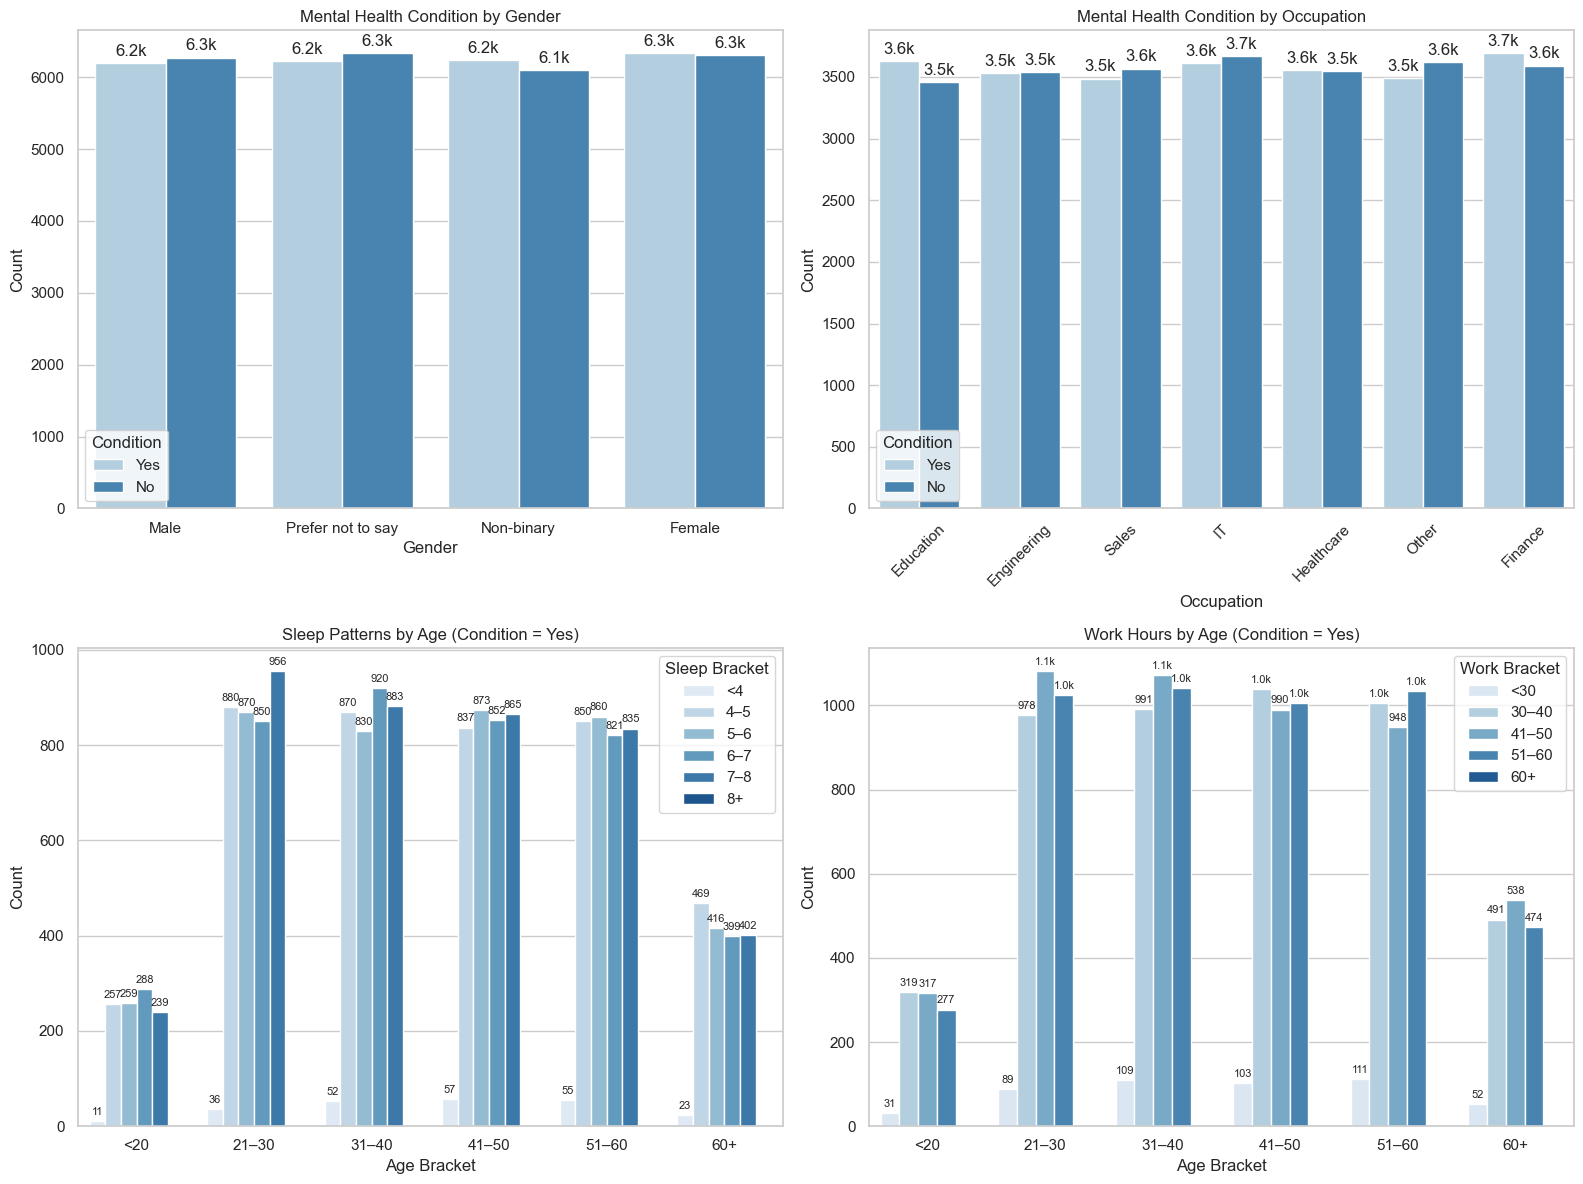

In [172]:
df_condition = df[df['Mental_Health_Condition'] == 'Yes']

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot 1: Gender
p1 = sns.countplot(ax=axes[0], data=df, x='Gender', hue='Mental_Health_Condition', palette='Blues')
axes[0].set_title('Mental Health Condition by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Condition')
for container in p1.containers:
    p1.bar_label(container, labels=[format_thousands(bar.get_height()) for bar in container], padding=3)

# Plot 2: Occupation
p2 = sns.countplot(ax=axes[1], data=df, x='Occupation', hue='Mental_Health_Condition', palette='Blues')
axes[1].set_title('Mental Health Condition by Occupation')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Condition')
for container in p2.containers:
    p2.bar_label(container, labels=[format_thousands(bar.get_height()) for bar in container], padding=3)

# Plot 3: Sleep Hours by Age (Condition = Yes)
p3 = sns.countplot(ax=axes[2], data=df_condition, x='Age_Bracket', hue='Sleep_Hour_Bracket',
                   palette='Blues', hue_order=['<4', '4–5', '5–6', '6–7', '7–8', '8+'])
axes[2].set_title('Sleep Patterns by Age (Condition = Yes)')
axes[2].set_xlabel('Age Bracket')
axes[2].set_ylabel('Count')
axes[2].legend(title='Sleep Bracket')
for container in p3.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            p3.annotate(format_thousands(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

# Plot 4: Work Hours by Age (Condition = Yes)
p4 = sns.countplot(ax=axes[3], data=df_condition, x='Age_Bracket', hue='Work_Hour_Bracket',
                   palette='Blues', hue_order=['<30', '30–40', '41–50', '51–60', '60+'])
axes[3].set_title('Work Hours by Age (Condition = Yes)')
axes[3].set_xlabel('Age Bracket')
axes[3].set_ylabel('Count')
axes[3].legend(title='Work Bracket')
for container in p4.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            p4.annotate(format_thousands(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

# Final layout adjustment
plt.tight_layout()
plt.show()


## Summary

1. Mental Health Condition by Gender
 - The count of individuals with and without mental health conditions is **nearly equal** across all gender categories (Male, Female, Non-binary, Prefer not to say).
 - This indicates that mental health concerns in this sample are distributed evenly, with **no gender bias**.

2. Mental Health Condition by Occupation
 - All major occupations show a similar split between those with and without a condition.
 - **Slightly higher counts of “Yes” are seen in Education, IT and Finance**, but overall the distribution remains balanced across roles.

3. Sleep Patterns by Age Bracket (Condition = Yes)
 - Among those reporting a mental health condition, the largest groups in each age bracket sleep **6–8 hours per night**.
 - Younger adults (<20 and 21–30) have more individuals sleeping less than 6 hours, suggesting that insufficient sleep may be an early indicator of distress.

4. Work Hours by Age Bracket (Condition = Yes)
 - Individuals with a condition most often work **41-60 hours per week**, especially in the **21–60 age range**.
 - Those under 20 tend to work fewer than 40 hours, while respondents over 60 show more in the 60+ category, indicating extended work commitments correlate with reported conditions.



## Multivariate Analysis

## Correlation Heatmap of Continuous Features

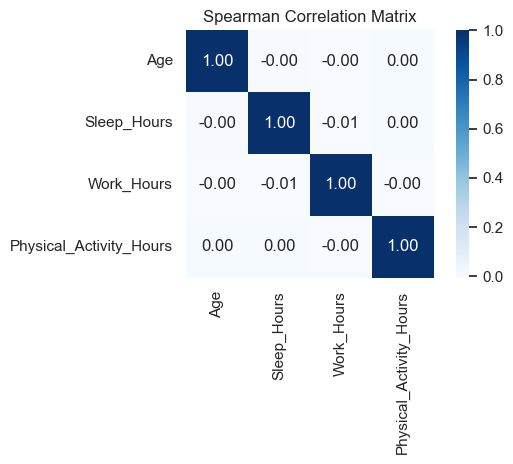

In [192]:
# compute and plot correlation matrix for numeric features
spearman_corr = df[['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']] \
                  .corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='Blues', square=True)
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

## Summary

We computed correlation for the true continuous variables (Age, Sleep_Hours, Work_Hours, Physical_Activity_Hours, Social_Media_Usage).
All off-diagonal values are essentially zero, indicating no strong monotonic relationships among these pairs. However, a near-zero Spearman ρ does not rule out any practical relationships—it simply means there is no consistent one-directional trend across the entire range.

To uncover more nuanced patterns, we will build targeted visuals that will reveal specific relationships between individual features and our outcomes, helping us find patterns that broad correlation measures missed.

## Targeted plots: Age vs Sleep/Work, Physical Activity vs Sleep, Social Media vs Work

/var/folders/b9/gmlc9swd59b1xm71sc2kp8bw0000gn/T/ipykernel_45732/539172132.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Age_Bracket')['Sleep_Hours'].median()
/var/folders/b9/gmlc9swd59b1xm71sc2kp8bw0000gn/T/ipykernel_45732/539172132.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('Age_Bracket')['Work_Hours'].median()
/var/folders/b9/gmlc9swd59b1xm71sc2kp8bw0000gn/T/ipykernel_45732/539172132.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

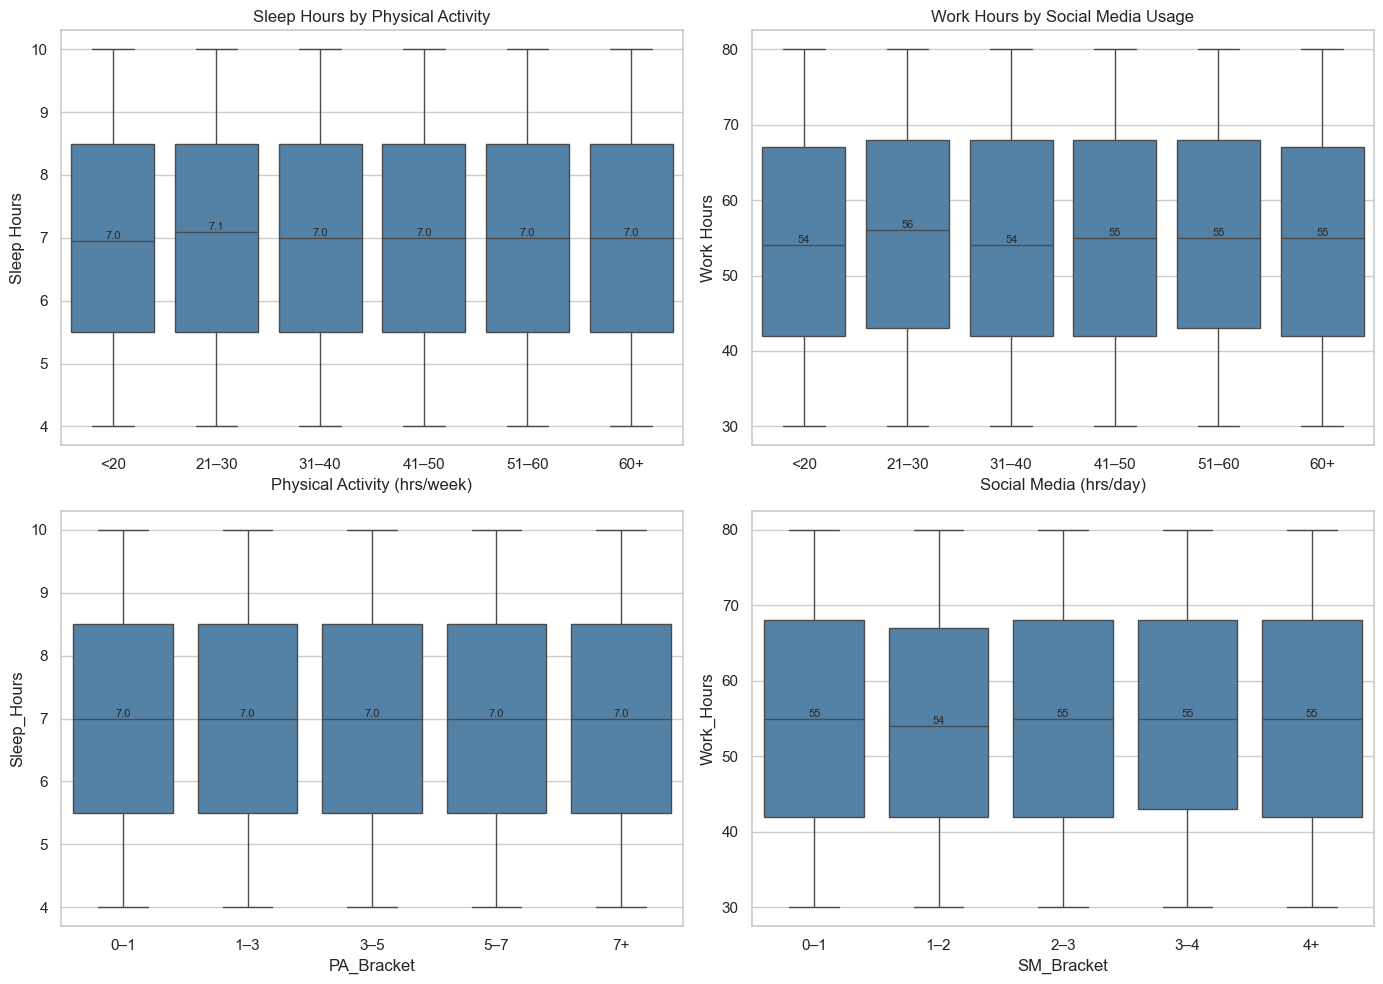

<Figure size 640x480 with 0 Axes>

In [206]:
# assumes df, plot_color, and bracket columns already exist
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1. Sleep Hours by Age Bracket (boxplot + median labels)
bp1 = sns.boxplot(
    ax=axes[0],
    x='Age_Bracket',
    y='Sleep_Hours',
    data=df,
    color=plot_color
)
axes[0].set_title('Sleep Hours by Age Bracket')
axes[0].set_xlabel('Age Bracket')
axes[0].set_ylabel('Sleep Hours')
medians = df.groupby('Age_Bracket')['Sleep_Hours'].median()
for i, age in enumerate(medians.index):
    m = medians.loc[age]
    axes[0].text(i, m, f'{m:.1f}', ha='center', va='bottom', fontsize=8)

# 2. Work Hours by Age Bracket (boxplot + median labels)
bp2 = sns.boxplot(
    ax=axes[1],
    x='Age_Bracket',
    y='Work_Hours',
    data=df,
    color=plot_color
)
axes[1].set_title('Work Hours by Age Bracket')
axes[1].set_xlabel('Age Bracket')
axes[1].set_ylabel('Work Hours')
medians = df.groupby('Age_Bracket')['Work_Hours'].median()
for i, age in enumerate(medians.index):
    m = medians.loc[age]
    axes[1].text(i, m, f'{m:.0f}', ha='center', va='bottom', fontsize=8)


# create brackets for clearer grouping
df['PA_Bracket'] = pd.cut(
    df['Physical_Activity_Hours'],
    bins=[0, 1, 3, 5, 7, 10],
    labels=['0–1', '1–3', '3–5', '5–7', '7+']
)
df['SM_Bracket'] = pd.cut(
    df['Social_Media_Usage'],
    bins=[0, 1, 2, 3, 4, 10],
    labels=['0–1', '1–2', '2–3', '3–4', '4+']
)


# Sleep Hours by Physical Activity bracket
bp1 = sns.boxplot(
    ax=axes[2],
    x='PA_Bracket',
    y='Sleep_Hours',
    data=df,
    color=plot_color
)
axes[0].set_title('Sleep Hours by Physical Activity')
axes[0].set_xlabel('Physical Activity (hrs/week)')
axes[0].set_ylabel('Sleep Hours')
med1 = df.groupby('PA_Bracket')['Sleep_Hours'].median()
for i, m in enumerate(med1):
    axes[2].text(i, m, f'{m:.1f}', ha='center', va='bottom', fontsize=8)

# Work Hours by Social Media bracket
bp2 = sns.boxplot(
    ax=axes[3],
    x='SM_Bracket',
    y='Work_Hours',
    data=df,
    color=plot_color
)
axes[1].set_title('Work Hours by Social Media Usage')
axes[1].set_xlabel('Social Media (hrs/day)')
axes[1].set_ylabel('Work Hours')
med2 = df.groupby('SM_Bracket')['Work_Hours'].median()
for i, m in enumerate(med2):
    axes[3].text(i, m, f'{m:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

## Summary

1. Sleep Hours by Physical Activity (hrs/week)
   - Median sleep time remains at **7.0 hours** across all activity levels.
   - Interquartile ranges and distributions are nearly identical, suggesting exercise duration does not strongly influence sleep duration.

2. Work Hours by Social Media Usage (hrs/day)
   - Median work hours cluster around **55 hours per week** for all social media brackets.
   - The consistency indicates daily social media use has minimal effect on average work‐week length.

3. Sleep Hours by Physical Activity Bracket
   - In activity bins (0–1, 1–3, 3–5, 5–7, 7+ hrs/week), the median sleep remains **7.0 hours** in every category.
   - Narrow variation across boxes reinforces that physical activity level alone does not shift sleep patterns.

4. Work Hours by Social Media Bracket
   - In social media bins (0–1, 1–2, 2–3, 3–4, 4+ hrs/day), the median work hours stay at **55 hours** for each group.
   - This further confirms that time spent on social platforms does not meaningfully alter typical work‐week length.


## Mental Health Condition vs 6 lifestyle factors

/var/folders/b9/gmlc9swd59b1xm71sc2kp8bw0000gn/T/ipykernel_45732/1144913465.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Mental_Health_Condition']).size().unstack().fillna(0)
/var/folders/b9/gmlc9swd59b1xm71sc2kp8bw0000gn/T/ipykernel_45732/1144913465.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([col, 'Mental_Health_Condition']).size().unstack().fillna(0)
/var/folders/b9/gmlc9swd59b1xm71sc2kp8bw0000gn/T/ipykernel_45732/1144913465.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas.

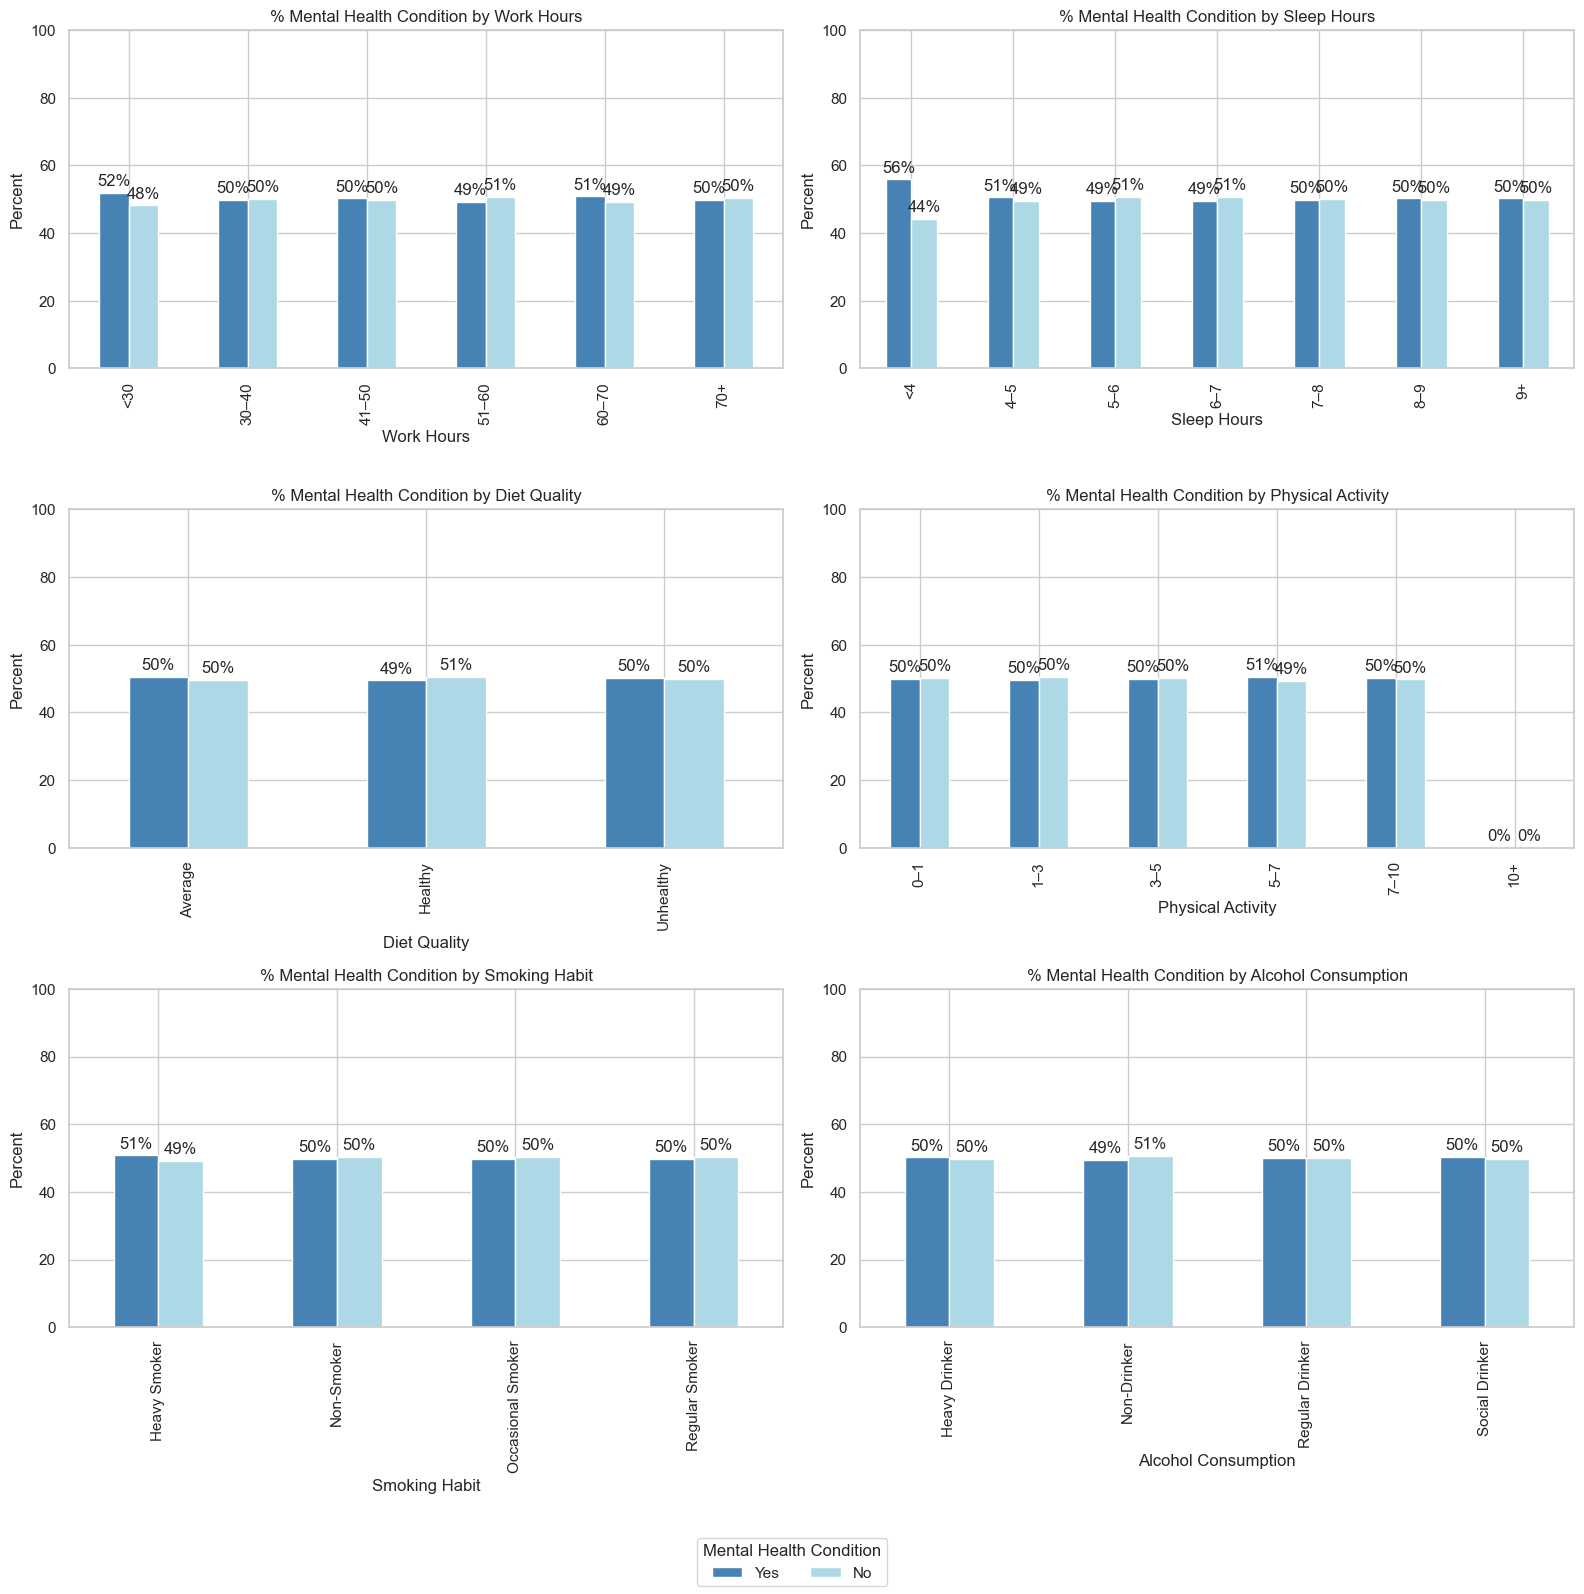

In [263]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()

features = [
    ('Work_Hour_Bracket', 'Work Hours'),
    ('Sleep_Hour_Bracket', 'Sleep Hours'),
    ('Diet_Quality', 'Diet Quality'),
    ('PA_Bracket', 'Physical Activity'),
    ('Smoking_Habit', 'Smoking Habit'),
    ('Alcohol_Consumption', 'Alcohol Consumption')
]


for ax, (col, title) in zip(axes, features):
    data = df.groupby([col, 'Mental_Health_Condition']).size().unstack().fillna(0)
    data_pct = (data.T / data.sum(axis=1)).T * 100
    data_pct = data_pct[['Yes', 'No']]  # consistent legend order
    data_pct.plot(kind='bar', ax=ax, stacked=False, color=['steelblue', 'lightblue'], legend=False)
    ax.set_title(f'% Mental Health Condition by {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Percent')
    ax.set_ylim(0, 100)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', padding=3)

# Add shared legend below
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, title='Mental Health Condition')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## Summary

In this analysis, we explored potential outliers through bivariate scatter plots involving key lifestyle variables such as Age, Sleep Hours, and Work Hours. The aim was to identify extreme behavior patterns that could relate to reported mental health conditions.

- Most individuals fell within expected ranges: **6–8 hours of sleep** and **40–60 work hours per week**.
- Younger participants showed slightly wider variation, but no strong age-based outlier patterns were evident.
- Scatter plots revealed a few cases with both **high work hours and low sleep**, but these were isolated and not enough to draw general conclusions.
- No significant separation or clustering was observed between individuals with and without mental health conditions.

**Conclusion**: Bivariate outlier analysis did not yield strong or actionable insights. We now proceed to PCA to examine whether multivariate patterns or separable clusters emerge across key lifestyle features.


## Principal Component Analysis 

We explored key lifestyle features and found no strong patterns or outliers that clearly separate people with and without mental health conditions.
Now we’ll use PCA to combine these features and see if any meaningful groupings emerge in lower dimensions.
The goal of PCA here is to:

- **Reduce the dimensionality** of our numeric data (Sleep Hours, Work Hours, etc.) while preserving most of the variability.
- **Visualize** the individuals in a 2D plot using the first two principal components (PC1 and PC2).
- **Color-code by Mental Health Condition** to check if the groups (Yes/No) form separate clusters or overlap heavily.

This analysis is conducted to help us understand whether lifestyle behaviors, when combined, provide a meaningful signal to distinguish mental health outcomes.


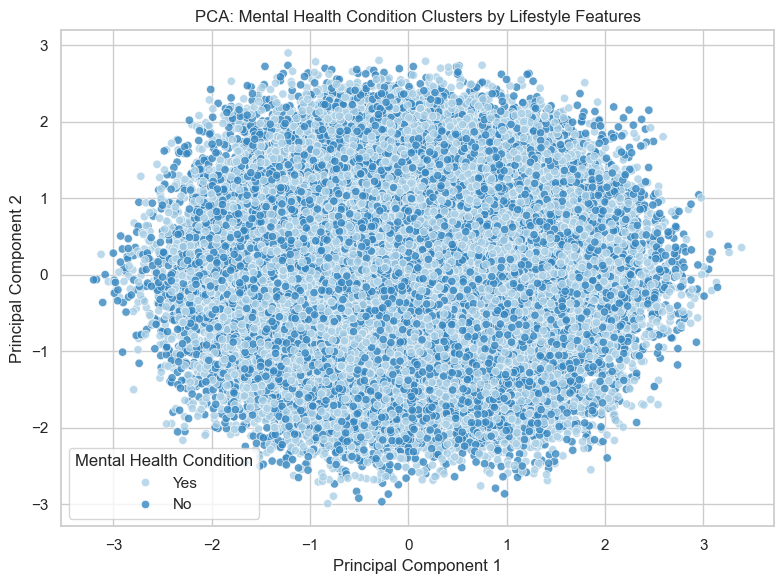

In [268]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# These features are directly linked to our problem: lifestyle and its impact on mental health
features = ['Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Age']
X = df[features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Combine results with target variable
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Mental_Health_Condition'] = df.loc[X.index, 'Mental_Health_Condition'].values

# Step 5: Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Mental_Health_Condition', palette='Blues', alpha=0.8)
plt.title('PCA: Mental Health Condition Clusters by Lifestyle Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Mental Health Condition')
plt.tight_layout()
plt.show()


## Summary


- The resulting PCA plot shows heavy overlap between both groups across the first two principal components.
- No clear separation or clustering was observed between "Yes" and "No" cases of mental health condition.
- This suggests that these lifestyle features, when combined linearly, do not provide enough variance to distinguish mental health status.

**Conclusion**: PCA did not reveal any distinct grouping or clustering based on the selected features. We may need to explore non-linear patterns, feature interactions, or apply clustering techniques to uncover hidden structures.
